In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cranedata = pd.read_csv(r"C:\Users\prabr\Desktop\GroupProjectWork\clean_crane_data.csv")
cranedata = cranedata[["OBSERVATION COUNT","COUNTRY","LATITUDE","LONGITUDE","OBSERVATION DATE"]]
cranedata.columns = pd.Index(["Count","Country","Lat","Long","Date"])


In [2]:
cranedata = cranedata.drop(index=[3557,6058,2853,4265])
cranedata = cranedata[cranedata["Count"]!="X"]
cranedata["Count"] = cranedata["Count"].astype("Float32")

In [3]:
cranedata["Date"]=pd.to_datetime(cranedata["Date"],dayfirst=True)

In [4]:
cranedata.set_index("Date")[["Count"]].resample("M").sum()

C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\438526586.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cranedata.set_index("Date")[["Count"]].resample("M").sum()


,Count
Date,
1905-05-31,2.0
1905-06-30,0.0
1905-07-31,0.0
1905-08-31,0.0
1905-09-30,0.0
...,...
2024-08-31,78653.0
2024-09-30,253639.0
2024-10-31,1528663.0


C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\2068955785.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.scatter(x=cranedata.set_index("Date")["Count"].resample("Y").sum().index,y=cranedata.set_index("Date")["Count"].resample("Y").sum().values)


Text(0.5, 0, 'Year')

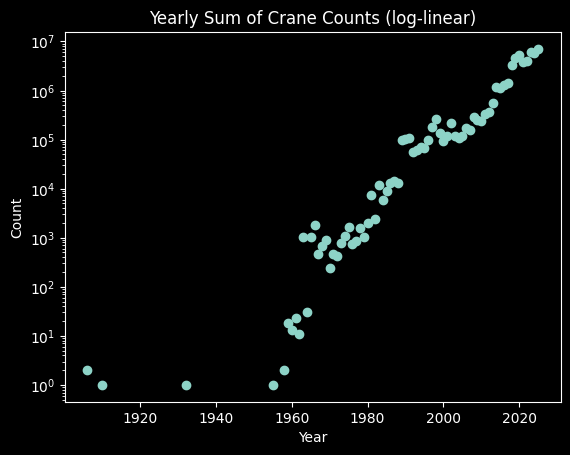

In [5]:
plt.scatter(x=cranedata.set_index("Date")["Count"].resample("Y").sum().index,y=cranedata.set_index("Date")["Count"].resample("Y").sum().values)
plt.title("Yearly Sum of Crane Counts (log-linear)")
plt.yscale("log")
plt.ylabel("Count")
plt.xlabel("Year")

data before 1960 should really be truncated

In [6]:
cranedata[(cranedata["Date"]>"1960-01-01")].set_index("Date")["Count"].resample("Y").sum().index.year

C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\404788470.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  cranedata[(cranedata["Date"]>"1960-01-01")].set_index("Date")["Count"].resample("Y").sum().index.year


Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 2024],
      dtype='int32', name='Date')

log curve reveals exponential rise at around 1960

In [7]:
np.polyfit(x=cranedata[(cranedata["Date"]>"1960-01-01")].set_index("Date")["Count"].resample("Y").sum().index.year.to_numpy(),
y=cranedata[(cranedata["Date"]>"1960-01-01")].set_index("Date")["Count"].resample("Y").sum().to_numpy(),deg=1)

C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\1345587042.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  np.polyfit(x=cranedata[(cranedata["Date"]>"1960-01-01")].set_index("Date")["Count"].resample("Y").sum().index.year.to_numpy(),
C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\1345587042.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  y=cranedata[(cranedata["Date"]>"1960-01-01")].set_index("Date")["Count"].resample("Y").sum().to_numpy(),deg=1)


array([ 5.76697336e+04, -1.14117023e+08])

log(y) = 57670x - 114117023

C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\1474221841.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.scatter(x=cranedata.set_index("Date")["Count"].resample("Y").std().index,y=cranedata.set_index("Date")["Count"].resample("Y").std().values)
C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\1474221841.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.scatter(x=cranedata.set_index("Date")["Count"].resample("Y").std().index,y=cranedata.set_index("Date")["Count"].resample("Y").std().values)


Text(0.5, 0, 'Year')

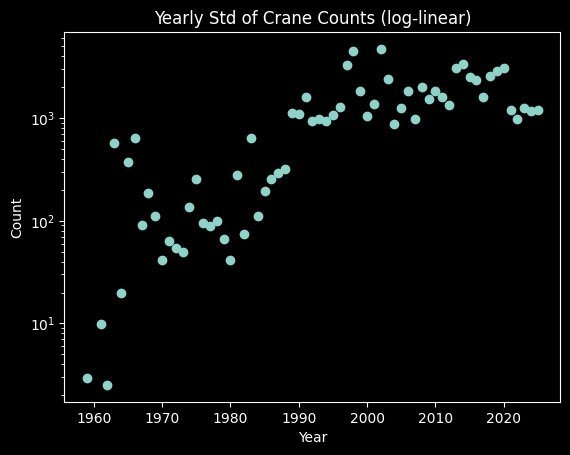

In [8]:
plt.scatter(x=cranedata.set_index("Date")["Count"].resample("Y").std().index,y=cranedata.set_index("Date")["Count"].resample("Y").std().values)
plt.title("Yearly Std of Crane Counts (log-linear)")
plt.yscale("log")
plt.ylabel("Count")
plt.xlabel("Year")

C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\1362517585.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(cranedata.set_index("Date")["Count"].resample("Y").mean().fillna(method="bfill"))
C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\1362517585.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(cranedata.set_index("Date")["Count"].resample("Y").mean().fillna(method="bfill"))


Text(0.5, 0, 'Year')

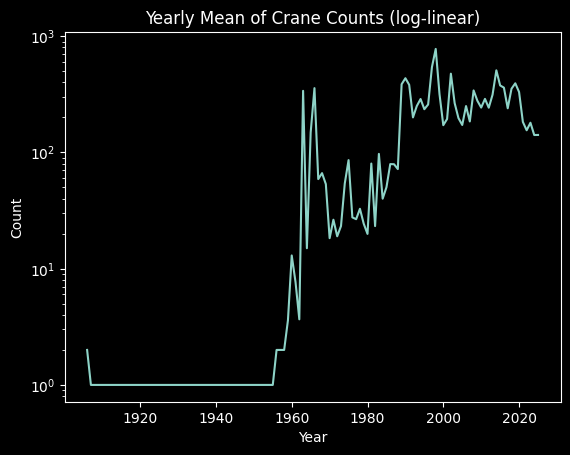

In [9]:
plt.plot(cranedata.set_index("Date")["Count"].resample("Y").mean().fillna(method="bfill"))
plt.title("Yearly Mean of Crane Counts (log-linear)")
plt.yscale("log")
plt.ylabel("Count")
plt.xlabel("Year")


C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\2303984831.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("Y").mean().fillna(method="bfill"))
C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\2303984831.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("Y").mean().fillna(method="bfill"))


Text(0, 0.5, 'Count')

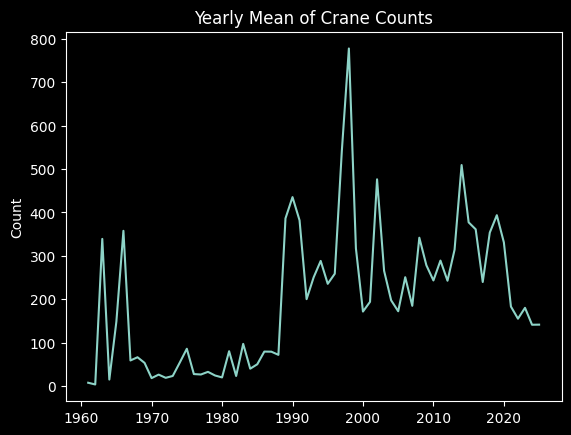

In [10]:
plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("Y").mean().fillna(method="bfill"))
plt.title("Yearly Mean of Crane Counts")

plt.ylabel("Count")



C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\3909731969.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").sum().fillna(method="bfill"))
C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\3909731969.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").sum().fillna(method="bfill"))


(np.float64(12000.0),
 np.float64(16000.0),
 np.float64(100.0),
 np.float64(1000000.0))

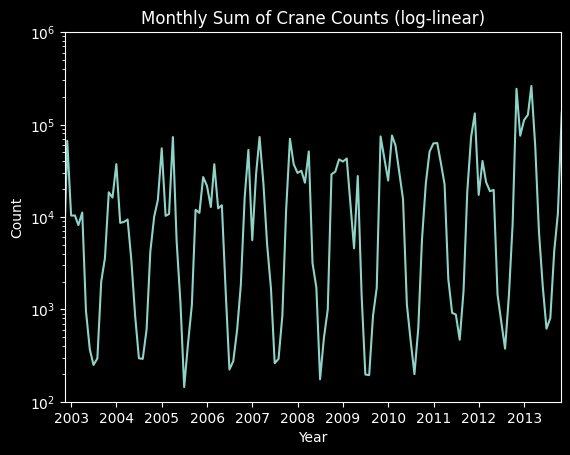

In [11]:
plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").sum().fillna(method="bfill"))
plt.title("Monthly Sum of Crane Counts (log-linear)")
plt.yscale("log")
plt.ylabel("Count")
plt.xlabel("Year")
plt.axis([12000,16000,100,1000000])

Strong seasonal behaviour

C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\3956009476.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(cranedata.set_index("Date")["Count"].resample("M").sum().fillna(method="bfill"))
C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\3956009476.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(cranedata.set_index("Date")["Count"].resample("M").sum().fillna(method="bfill"))


(array([14061., 14153., 14245., 14335., 14426., 14518., 14610., 14700.,
        14791., 14883., 14975.]),
 [Text(14061.0, 0, '2008-07'),
  Text(14153.0, 0, '2008-10'),
  Text(14245.0, 0, '2009-01'),
  Text(14335.0, 0, '2009-04'),
  Text(14426.0, 0, '2009-07'),
  Text(14518.0, 0, '2009-10'),
  Text(14610.0, 0, '2010-01'),
  Text(14700.0, 0, '2010-04'),
  Text(14791.0, 0, '2010-07'),
  Text(14883.0, 0, '2010-10'),
  Text(14975.0, 0, '2011-01')])

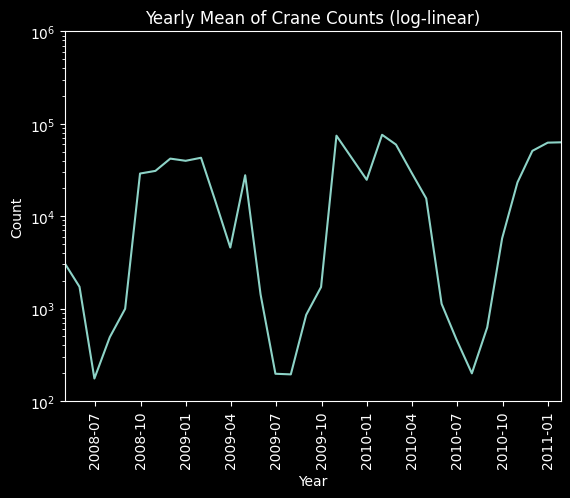

In [12]:
plt.plot(cranedata.set_index("Date")["Count"].resample("M").sum().fillna(method="bfill"))
plt.title("Yearly Mean of Crane Counts (log-linear)")
plt.yscale("log")
plt.ylabel("Count")
plt.xlabel("Year")
plt.axis([14000,15000,100,1000000])
plt.xticks(rotation=90)

period of roughly 12 months

seems as though on month 7 (July) crane count is lowest

on month 12 to 5 (december to may) they are at the highest

pretty constant throughout 2000 to 2024

C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\1232763323.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))
C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\1232763323.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))


Text(0, 0.5, 'Count')

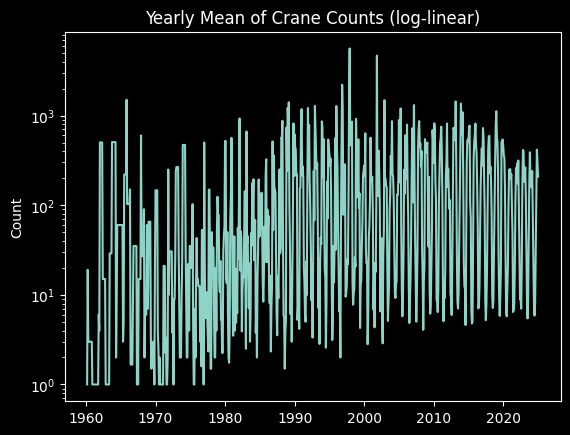

In [13]:
plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))
plt.title("Yearly Mean of Crane Counts (log-linear)")
plt.yscale("log")
plt.ylabel("Count")



some what clear but weak trend, very clear seasonality

C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\2714168113.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill").diff().iloc[1:])
C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\2714168113.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill").diff().iloc[1:])


Text(0, 0.5, 'Count')

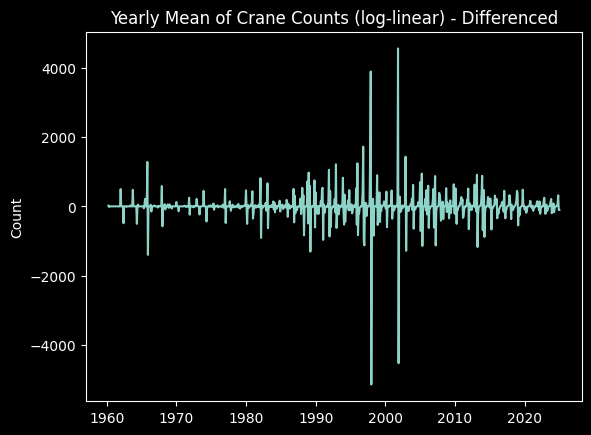

In [14]:
plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill").diff().iloc[1:])
plt.title("Yearly Mean of Crane Counts (log-linear) - Differenced")
plt.ylabel("Count")

C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\2448610275.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))
C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\2448610275.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))
C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\2448610275.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.axis([8000,13000,-6000,6000])


(array([ 7305.,  8035.,  8766.,  9496., 10227., 10957., 11688., 12418.,
        13149.]),
 [Text(7305.0, 0, '1990'),
  Text(8035.0, 0, '1992'),
  Text(8766.0, 0, '1994'),
  Text(9496.0, 0, '1996'),
  Text(10227.0, 0, '1998'),
  Text(10957.0, 0, '2000'),
  Text(11688.0, 0, '2002'),
  Text(12418.0, 0, '2004'),
  Text(13149.0, 0, '2006')])

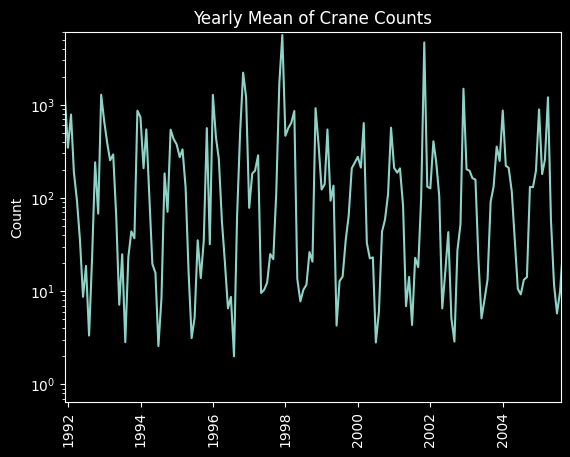

In [15]:
plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))
plt.title("Yearly Mean of Crane Counts")
plt.yscale("log")
plt.ylabel("Count")
plt.axis([8000,13000,-6000,6000])
plt.xticks(rotation=90)

C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\4103124258.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill").diff().iloc[1:])
C:\Users\prabr\AppData\Local\Temp\ipykernel_7276\4103124258.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill").diff().iloc[1:])


(array([ 7305.,  8035.,  8766.,  9496., 10227., 10957., 11688., 12418.,
        13149.]),
 [Text(7305.0, 0, '1990'),
  Text(8035.0, 0, '1992'),
  Text(8766.0, 0, '1994'),
  Text(9496.0, 0, '1996'),
  Text(10227.0, 0, '1998'),
  Text(10957.0, 0, '2000'),
  Text(11688.0, 0, '2002'),
  Text(12418.0, 0, '2004'),
  Text(13149.0, 0, '2006')])

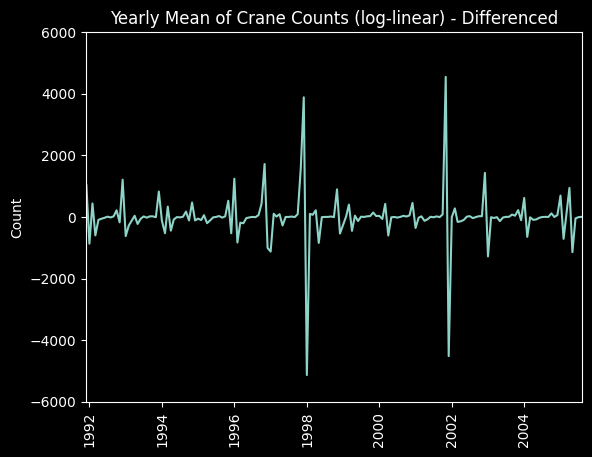

In [16]:
plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill").diff().iloc[1:])
plt.title("Yearly Mean of Crane Counts (log-linear) - Differenced")
plt.ylabel("Count")
plt.axis([8000,13000,-6000,6000])
plt.xticks(rotation=90)

In [17]:
from statsmodels.tsa.stattools import adfuller 
import warnings
warnings.filterwarnings("ignore")

print("Adfuller before differencing: ",adfuller(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))[1].astype("float32"))
print("Adfuller after differencing: ",adfuller(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill").diff().iloc[1:])[1].astype("float32"))

Adfuller before differencing:  0.00019979106
Adfuller after differencing:  2.9259643e-19


Text(0.5, 1.0, 'PACF Plot (Differenced)')

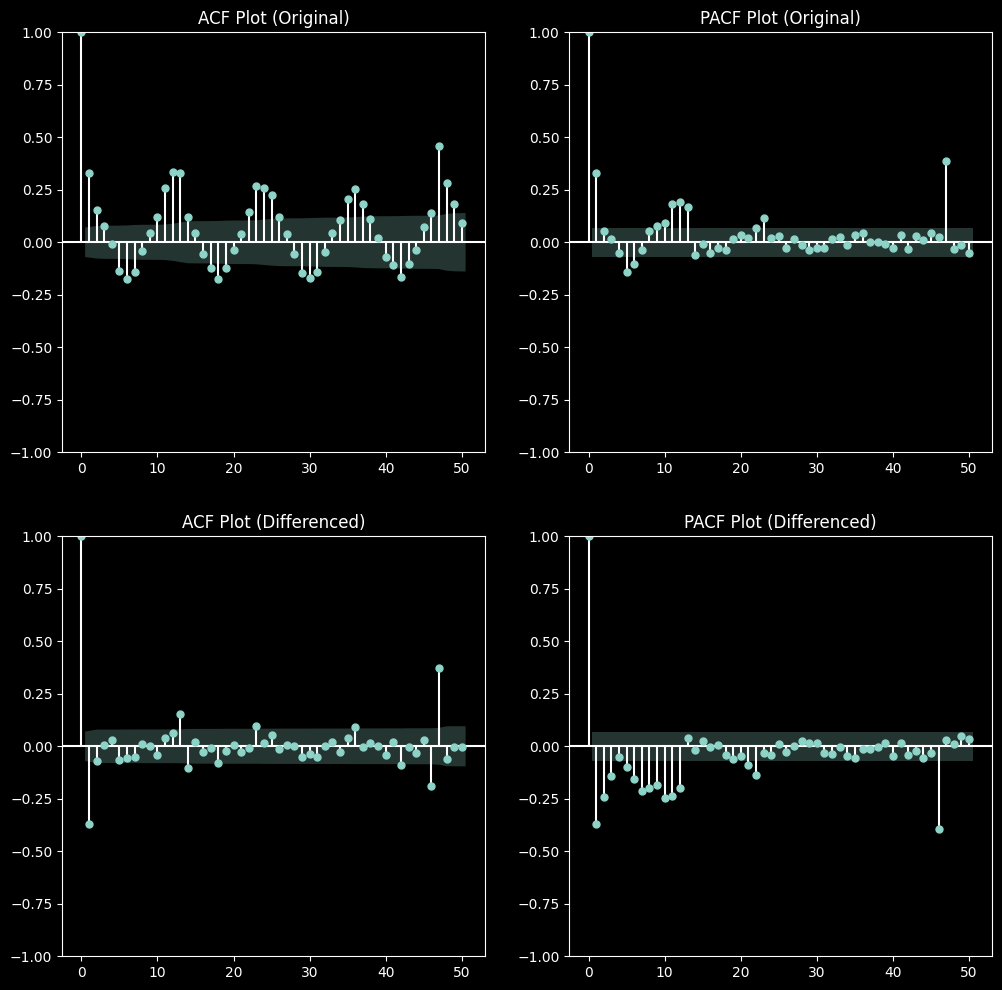

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

y = cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill")
dy = cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill").diff().iloc[1:]

fig,axs = plt.subplots(2,2,figsize=(12,12))

lag = 50

#Plot 3: ACF Plot of the original series
plot_acf(y,ax=axs[0,0],lags=lag)
axs[0,0].set_title("ACF Plot (Original)")

#Plot 4: PACF Plot of the original series
plot_pacf(y,ax=axs[0,1],lags=lag,method="ywm")
axs[0,1].set_title("PACF Plot (Original)")

#Plot 5: ACF Plot of the differenced series
plot_acf(dy,ax=axs[1,0],lags=lag)
axs[1,0].set_title("ACF Plot (Differenced)")

#Plot 6: PACF Plot of the differenced series
plot_pacf(dy,ax=axs[1,1],lags=lag,method="ywm")
axs[1,1].set_title("PACF Plot (Differenced)")

Large peak at 46-47

Seasonality component (1,1,1) [47] perhaps

Text(0.5, 1.0, 'PACF Plot (Differenced)')

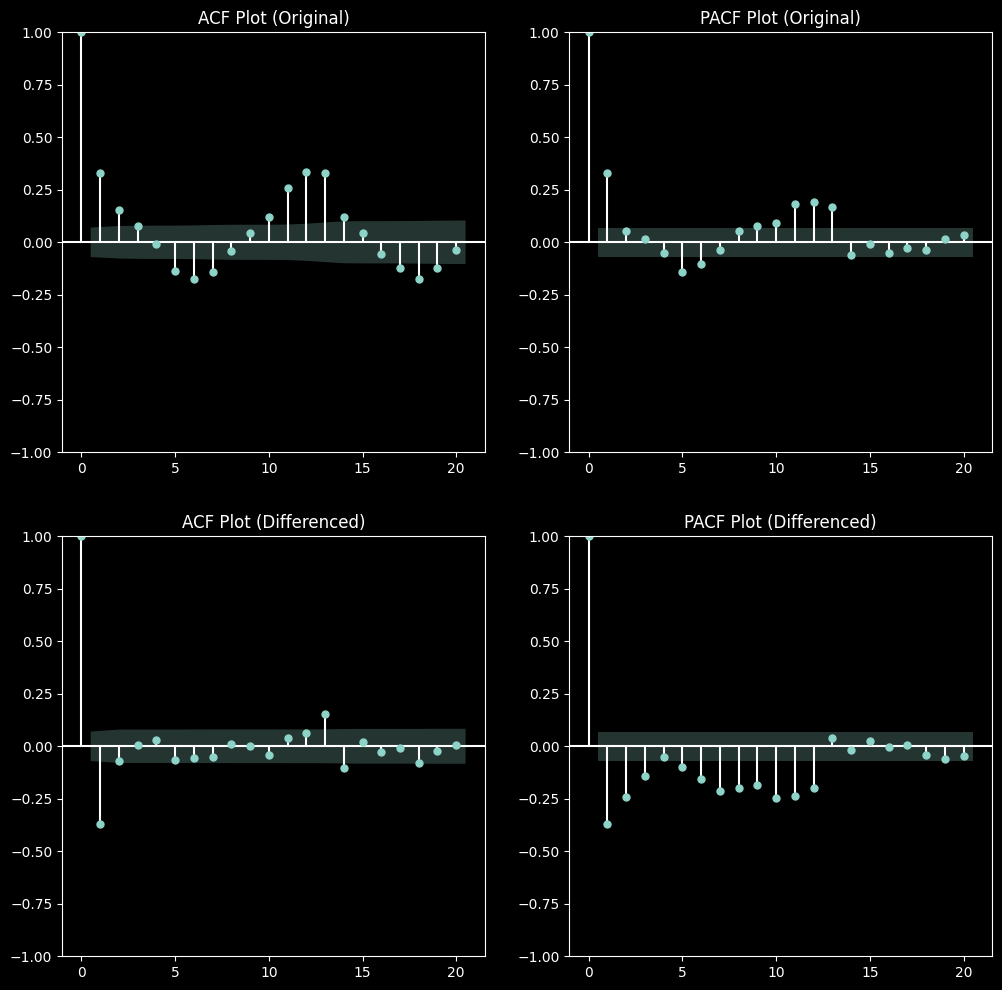

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf    

y = cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill")
dy = cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill").diff().iloc[1:]

fig,axs = plt.subplots(2,2,figsize=(12,12))

lag = 20

#Plot 3: ACF Plot of the original series
plot_acf(y,ax=axs[0,0],lags=lag)
axs[0,0].set_title("ACF Plot (Original)")

#Plot 4: PACF Plot of the original series
plot_pacf(y,ax=axs[0,1],lags=lag,method="ywm")
axs[0,1].set_title("PACF Plot (Original)")

#Plot 5: ACF Plot of the differenced series
plot_acf(dy,ax=axs[1,0],lags=lag)
axs[1,0].set_title("ACF Plot (Differenced)")

#Plot 6: PACF Plot of the differenced series
plot_pacf(dy,ax=axs[1,1],lags=lag,method="ywm")
axs[1,1].set_title("PACF Plot (Differenced)")

peak at 13 ACF 

MA(1) appropriate for ACF Plot

PACF has 3 conseucitive peaks so AR(3) appropriate

In [20]:
from statsmodels.tsa.arima.model import ARIMA

for d in [0,1]:
    for p in [2,3]:
        for q in [1,2]:
            model = ARIMA(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"),order = (p,d,q))
            results = model.fit()
            print(f"p= {p}, d= {d}, q= {q} | results = {round(results.aic,2)}")

p= 2, d= 0, q= 1 | results = 11352.54
p= 2, d= 0, q= 2 | results = 11354.61
p= 3, d= 0, q= 1 | results = 11354.32
p= 3, d= 0, q= 2 | results = 11338.35
p= 2, d= 1, q= 1 | results = 11331.05
p= 2, d= 1, q= 2 | results = 11325.48
p= 3, d= 1, q= 1 | results = 11333.0
p= 3, d= 1, q= 2 | results = 11334.18


lowest error at (p,d,q) at (2,1,2)

In [21]:
model = ARIMA(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"),order = (2,1,2))
results = model.fit()

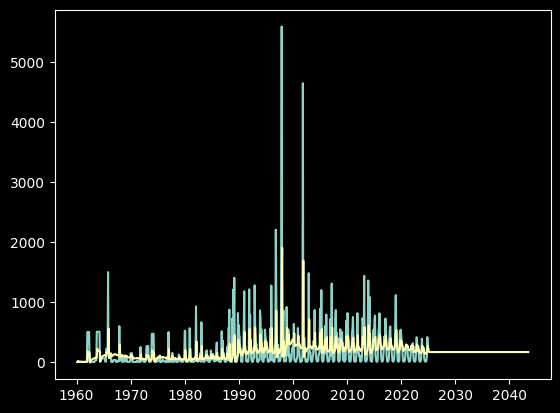

In [22]:
plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))
plt.plot(results.predict(strat=0,end=1000))

q=2 is appropriate

In [23]:
"""from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"), order = (2,1,2),seasonal_order=(0,1,1,47),enforce_stationarity=False)
results = model.fit()
plt.plot(results.forecast(steps=200))
plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))"""

'from statsmodels.tsa.statespace.sarimax import SARIMAX\n\nmodel = SARIMAX(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"), order = (2,1,2),seasonal_order=(0,1,1,47),enforce_stationarity=False)\nresults = model.fit()\nplt.plot(results.forecast(steps=200))\nplt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))'

In [24]:
"""from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"), order = (2,1,2),seasonal_order=(0,1,2,47),enforce_stationarity=False)
results = model.fit()
plt.plot(results.forecast(steps=200))
plt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))"""

'from statsmodels.tsa.statespace.sarimax import SARIMAX\n\nmodel = SARIMAX(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"), order = (2,1,2),seasonal_order=(0,1,2,47),enforce_stationarity=False)\nresults = model.fit()\nplt.plot(results.forecast(steps=200))\nplt.plot(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))'

Text(0, 0.5, 'Crane Count')

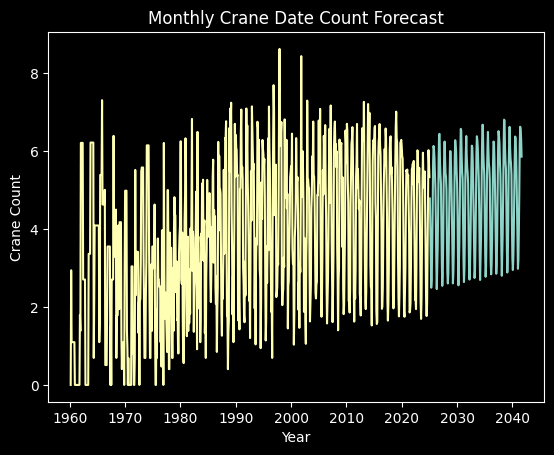

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(np.log(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill")), order = (2,1,2),seasonal_order=(0,1,1,47),enforce_stationarity=False)
results = model.fit()
plt.plot(results.forecast(steps=200))
plt.plot(np.log(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill")))
plt.title("Monthly Average Crane Date Count Forecast")
plt.xlabel("Year")
plt.ylabel("Crane Count")

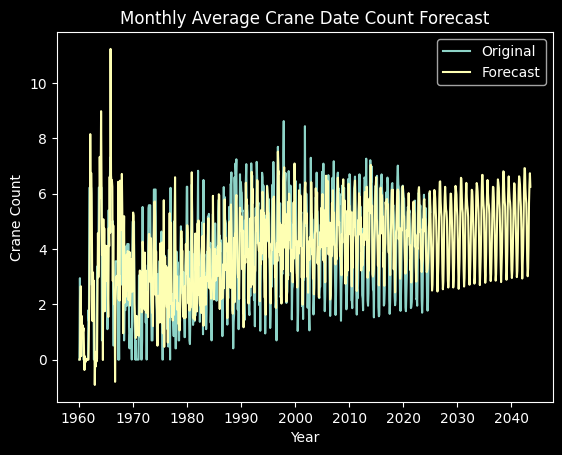

In [45]:

plt.plot(np.log(cranedata[cranedata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill")),label="Original")
plt.plot(results.predict(start=0,end=1000),label="Forecast")
plt.title("Monthly Average Crane Date Count Forecast")
plt.xlabel("Year")
plt.ylabel("Crane Count")
plt.legend()

Use logged y axis instead as is more noticeable this way

<h3> must do location based analysis

In [27]:
cranedata["Year"] = cranedata["Date"].dt.year
cranedata["Month"] = cranedata["Date"].dt.month

changeperyear = pd.pivot_table(data=cranedata,index=cranedata["Country"],columns="Year",values="Count",aggfunc="mean").pct_change(axis=1).dropna(how="all").fillna(0) * 100

def changelookup_year(country,Year_Lower,Year_Upper):
    return changeperyear.loc[country,Year_Lower:Year_Upper]
    


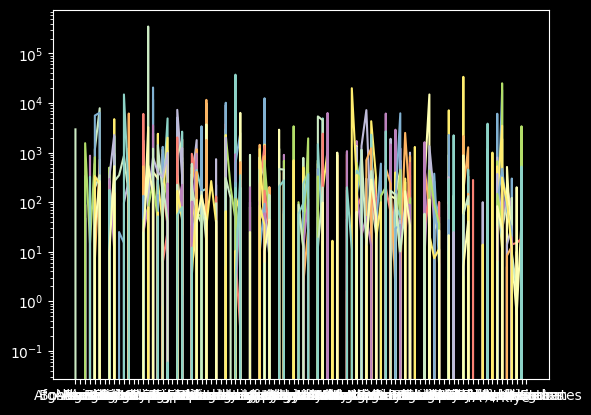

In [28]:
plt.plot(changeperyear)
plt.yscale("log")

Text(0, 0.5, 'Average % Change')

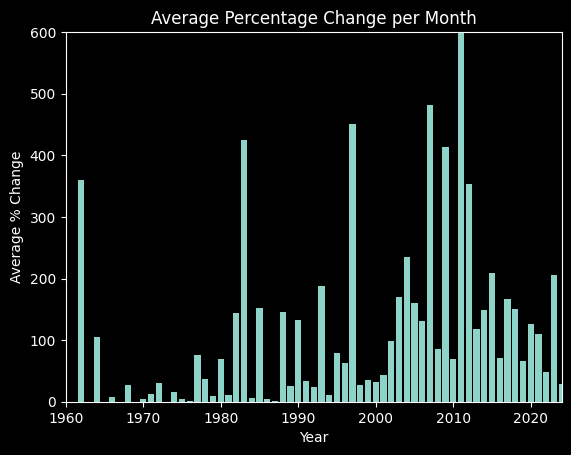

In [29]:
plt.bar(x = changeperyear.mean(axis=0).index,height=changeperyear.mean(axis=0))
plt.axis([1960,2024,0,600])
plt.title("Average Percentage Change per Month")
plt.xlabel("Year")
plt.ylabel("Average % Change")

peaks are getting closer and closer together. more frequent mass population changes + more overall activity in recent years

due to more disruption? climate? 

Text(0, 0.5, '% Change')

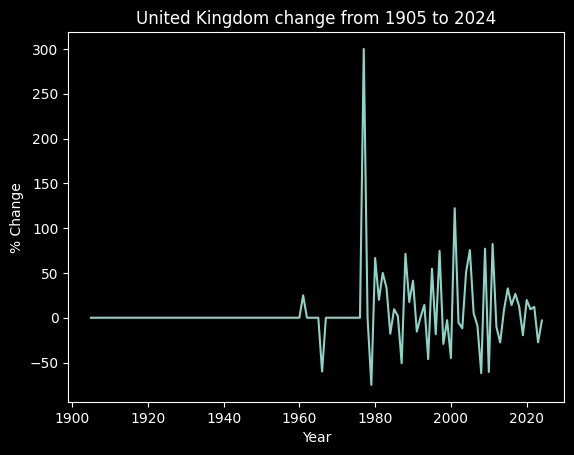

In [30]:
Country = "United Kingdom"
lower = 1905
upper = 2024
plt.plot(changelookup_year(Country,lower,upper))
plt.title(f"{Country} change from {lower} to {upper}")
plt.xlabel("Year")
plt.ylabel("% Change")

In [31]:
changepermonth = pd.pivot_table(data=cranedata,index=cranedata["Country"],columns="Month",values="Count",aggfunc="mean").pct_change(axis=1).dropna(how="all").fillna(0) * 100
def changelookup_month(country,Month_Lower,Month_Upper):
    return changepermonth.loc[country,Month_Lower:Month_Upper]
    

Text(0, 0.5, '% Change')

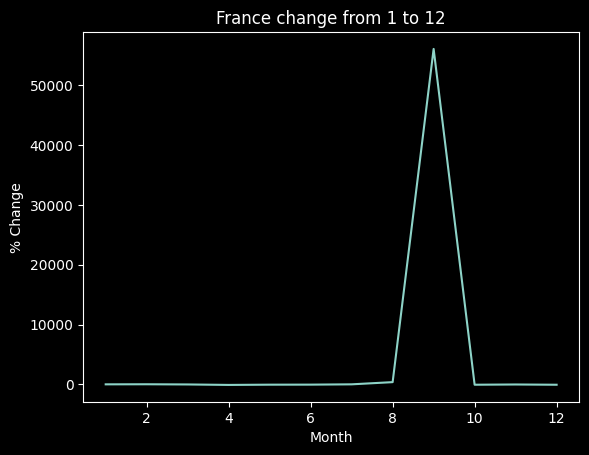

In [32]:
Country = "France"
lower = 1
upper = 12
plt.plot(changelookup_month(Country,lower,upper))
plt.title(f"{Country} change from {lower} to {upper}")
plt.xlabel("Month")
plt.ylabel("% Change")

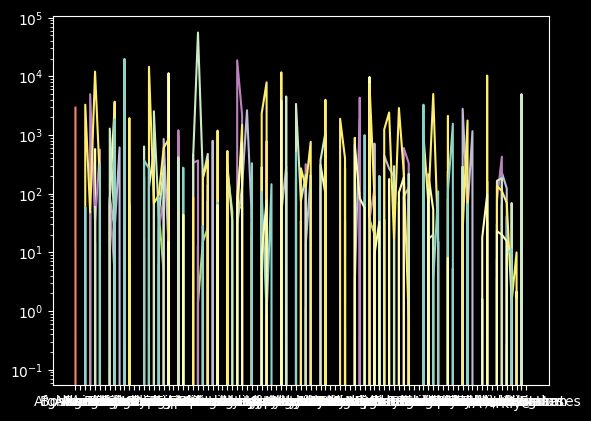

In [33]:
plt.plot(changepermonth)
plt.yscale("log")

Text(0, 0.5, 'Average % Change')

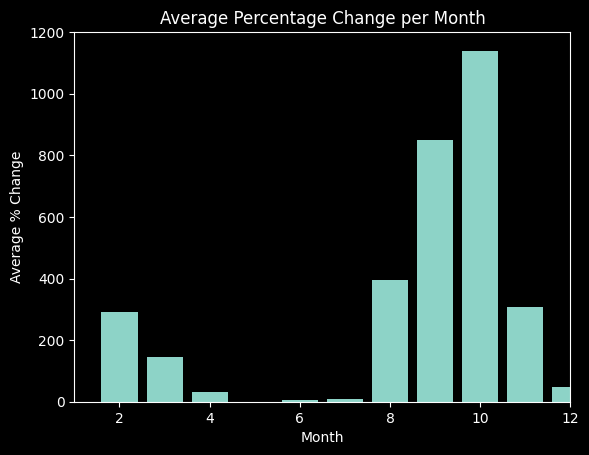

In [34]:
plt.bar(x = changepermonth.mean(axis=0).index,height=changepermonth.mean(axis=0))

plt.axis([1,12,0,1200])
plt.title("Average Percentage Change per Month")
plt.xlabel("Month")
plt.ylabel("Average % Change")

<BarContainer object of 94 artists>

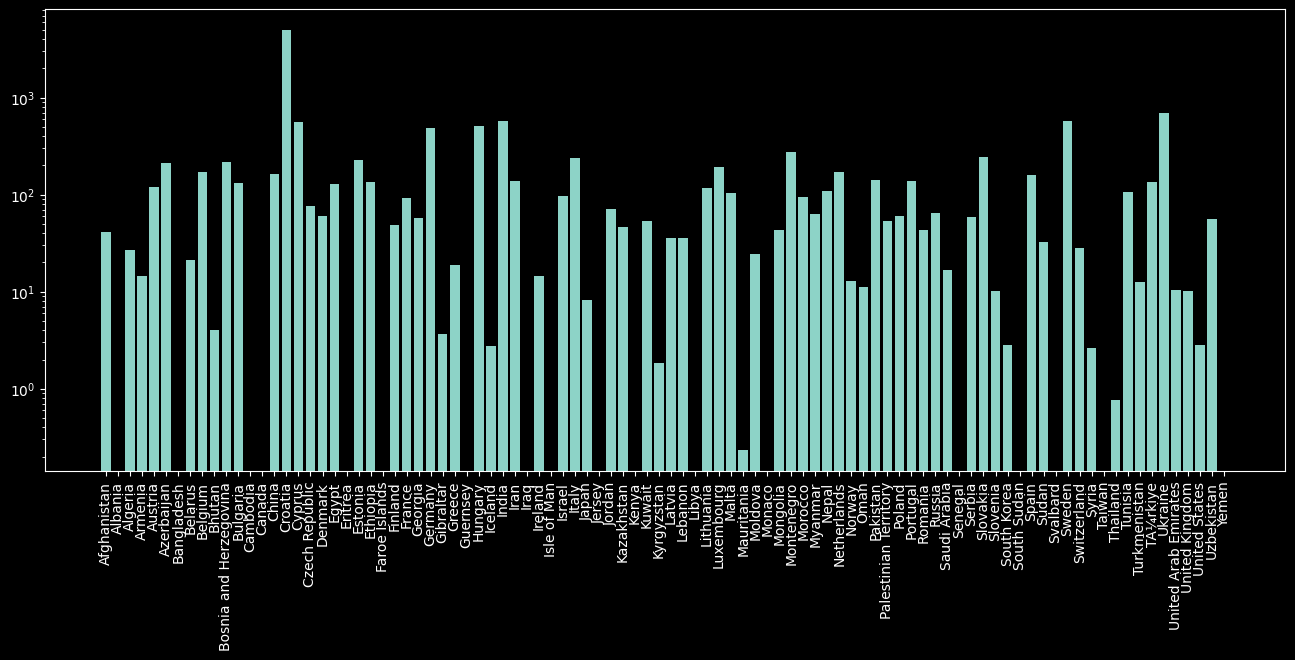

In [35]:
plt.figure(figsize=(16,6))
plt.yscale("log")
plt.xticks(rotation=90)
plt.bar(x=changeperyear.mean(axis=1).index,height=changeperyear.mean(axis=1))


<BarContainer object of 20 artists>

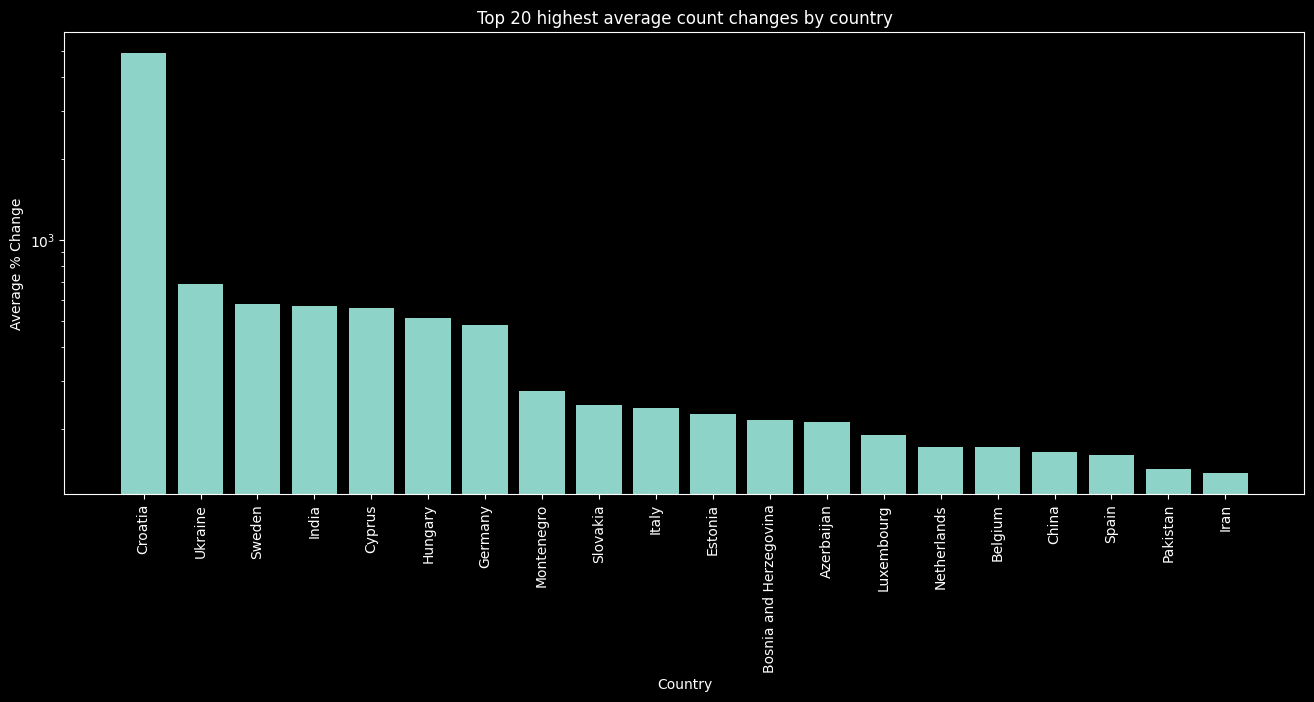

In [36]:

headcount = 20
plt.figure(figsize=(16,6))
plt.yscale("log")
plt.title(f"Top {headcount} highest average count changes by country")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Average % Change")
plt.bar(x=changeperyear.mean(axis=1).sort_values(ascending=False).head(headcount).index,
        height=changeperyear.mean(axis=1).sort_values(ascending=False).head(headcount))


In [37]:
avgpositionbyyear = cranedata[["Year","Lat","Long"]].groupby("Year").mean()
avgpositionbymonth = cranedata[["Month","Lat","Long"]].groupby("Month").mean()

(np.float64(35.0), np.float64(60.0), np.float64(-20.0), np.float64(40.0))

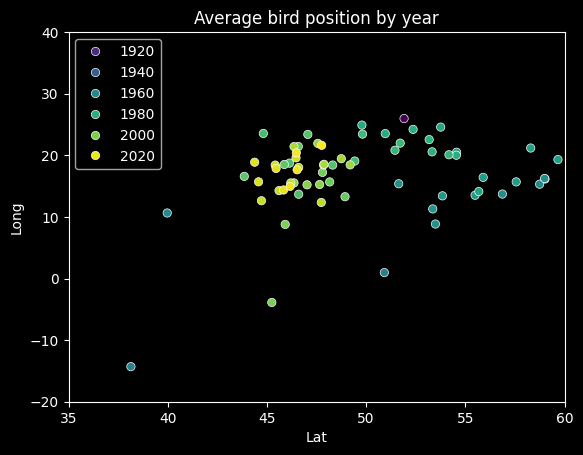

In [38]:
import seaborn as sns

sns.scatterplot(data=avgpositionbyyear,x="Lat",y="Long",hue="Year",palette="viridis")
plt.title("Average bird position by year")
plt.legend()
plt.axis([35,60,-20,40]) #ignoring outlier points

outwards points moving inwards over the years. More sightings appear in the centre over the yeras and less on the outer parts

In [39]:
errorperyear = 1 * cranedata[["Year","Lat","Long"]].groupby("Year").std().mean()
errorperyear

Lat     10.211639
Long    21.366699
dtype: float64

<Axes: title={'center': 'Average bird position by month'}, xlabel='Lat', ylabel='Long'>

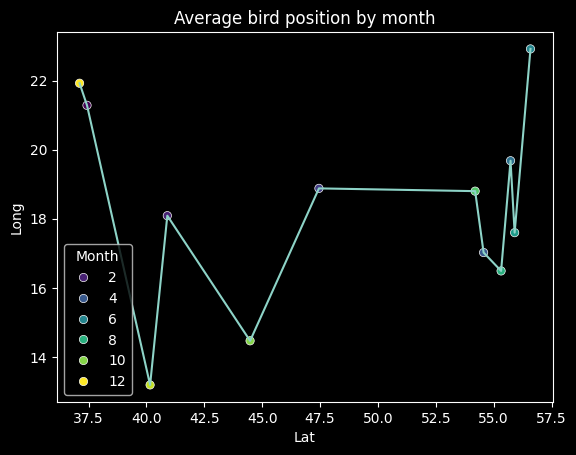

In [40]:
plt.title("Average bird position by month")
sns.lineplot(data=avgpositionbymonth,x="Lat",y="Long")

sns.scatterplot(data=avgpositionbymonth,x="Lat",y="Long",hue="Month",palette="viridis")

average migration path over the year? They seem to migrate from west to east

In [41]:
errorpermonth = 1 * cranedata[["Month","Lat","Long"]].groupby("Month").std().mean()
errorpermonth

Lat      7.814960
Long    27.514935
dtype: float64